In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("G:\\PythonCode\\Breast-Cancer-Detection-using-Machine-Learning-master\\Breast-Cancer-Detection-using-Machine-Learning-master\\cancer dataset.csv")
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])
data['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [8]:
data['diagnosis'] = data['diagnosis'].astype('float')
data['diagnosis']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    0.0
Name: diagnosis, Length: 569, dtype: float64

In [9]:
y = pd.DataFrame(data.iloc[:, 1])
X = pd.DataFrame(data.iloc[:, 2:])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [12]:
print(X_train.shape)
print(y_train.shape)

(398, 30)
(398, 1)


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred = classifier.predict(X_test)

In [20]:
print("Accuracy of the Model :", classifier.score(X_test, y_test))

Accuracy of the Model : 0.9415204678362573


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :", cm)

Confusion Matrix : [[106   2]
 [  8  55]]


In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

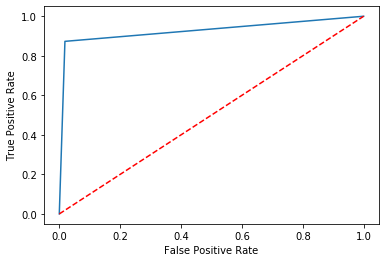

In [30]:
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression(area = %0.2f)'%logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
